<a href="https://colab.research.google.com/github/NimaZah/DN/blob/main/DARWIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
# digest data

df= pd.read_csv('https://raw.githubusercontent.com/NimaZah/DN/main/DN.csv')
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [3]:
# identify the target

X = df.drop(['class', 'ID'], axis=1)
y = df['class']

In [4]:
# Split the data into training and testing sets

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
        test_size=0.2, random_state=1)

# Decision Tree Classifiier

In [5]:
# Create the pipeline

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Fit the pipeline to the training data

pipe.fit(X_train, y_train)

# Predict the labels of the test data

y_pred = pipe.predict(X_test)

# Evaluate the accuracy

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7714285714285715


In [6]:
# Create the hyperparameter grid

param_grid = {'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5],
              'decisiontreeclassifier__min_samples_leaf': [0.12, 0.14,
              0.16, 0.18]}

# Instantiate the GridSearchCV object

grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Decision Tree Parameter: {}'.format(grid.best_params_))
print('Tuned Decision Tree Accuracy: {}'.format(grid.best_score_))

Tuned Decision Tree Parameter: {'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__min_samples_leaf': 0.12}
Tuned Decision Tree Accuracy: 0.8351851851851851


# BaggingClassifier

In [7]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'bootstrap': [True],
    'bootstrap_features': [True],
    'random_state': [0],
    'n_jobs': [-1],
    }

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(BaggingClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Bagging Parameter: {}'.format(grid.best_params_))
print('Tuned Bagging Accuracy: {}'.format(grid.best_score_))


Tuned Bagging Parameter: {'random_state': 0, 'n_jobs': -1, 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5, 'bootstrap_features': True, 'bootstrap': True}
Tuned Bagging Accuracy: 0.8634920634920636


# Adaboost classifier with the base classifier, decision tree

In [8]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100)

# Fit the classifier to the training data

clf.fit(X_train, y_train)

# Predict the labels of the test data

y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7714285714285715


[Text(0.4444444444444444, 0.875, 'X[413] <= 8490.0\ngini = 0.5\nsamples = 139\nvalue = [68, 71]'),
 Text(0.2222222222222222, 0.625, 'X[302] <= 16915.0\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.6666666666666666, 0.625, 'X[140] <= 2785.0\ngini = 0.308\nsamples = 79\nvalue = [15, 64]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.499\nsamples = 23\nvalue = [11, 12]'),
 Text(0.7777777777777778, 0.375, 'X[349] <= 0.165\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]')]

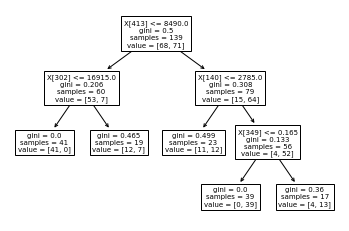

In [9]:
# Visualize the decision tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.12)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

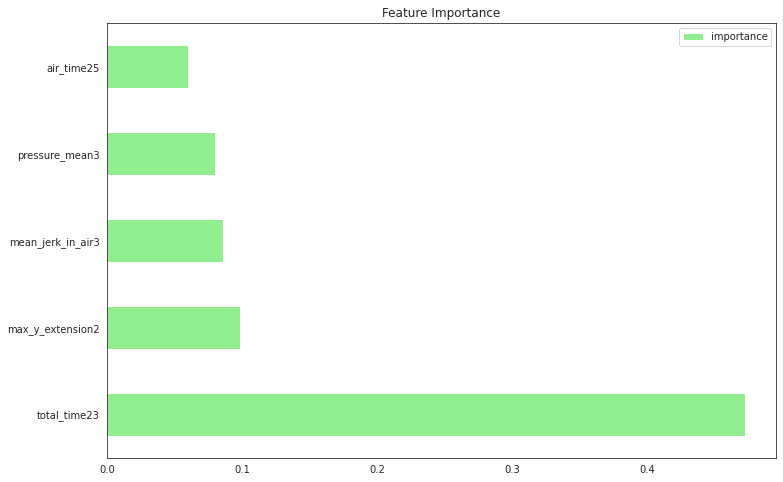

In [ ]:
# plot the top 5 features

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style

sns.set_style('white')
plt.rcParams['figure.figsize'] = (12, 8)

# Create a dataframe with the feature importances

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance'
                                   ]).sort_values('importance',
        ascending=False)

# Plot the feature importances

feature_importances.head(5).plot(kind='barh', color='lightgreen')
plt.title('Feature Importance')
plt.show()

# Random Forest Classifier

In [17]:
# Create the hyperparameter grid

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
    'random_state': [0],
    'n_jobs': [-1],
    'oob_score': [True],
    'bootstrap': [True],
    }

grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Random Forest Parameter: {}'.format(grid.best_params_))
print('Tuned Random Forest Accuracy: {}'.format(grid.best_score_))


Tuned Random Forest Parameter: {'random_state': 0, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_leaf': 0.14, 'max_depth': 3, 'bootstrap': True}
Tuned Random Forest Accuracy: 0.8706349206349205


# KNN Classifier

In [18]:
# -*- coding: utf-8 -*-
param_grid = {
    'n_neighbors': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        ],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }

# Instantiate the GridSearchCV object

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned KNN Parameter: {}'.format(grid.best_params_))
print('Tuned KNN Accuracy: {}'.format(grid.best_score_))


Tuned KNN Parameter: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Tuned KNN Accuracy: 0.7333333333333333


# Gaussian Naive Bayes

In [19]:
# Create the hyperparameter grid

param_grid = {'var_smoothing': [
    1e-9,
    1e-8,
    1e-7,
    1e-6,
    1e-5,
    1e-4,
    1e-3,
    1e-2,
    1e-1,
    ]}

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(GaussianNB(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned GNB Parameter: {}'.format(grid.best_params_))
print('Tuned GNB Accuracy: {}'.format(grid.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Tuned GNB Parameter: {'var_smoothing': 1e-06}
Tuned GNB Accuracy: 0.8563492063492063


# Multi-layer Perceptron Classifier

In [ ]:
# Create the hyperparameter grid

param_grid = {
    'hidden_layer_sizes': [(10, ), (50, ), (100, )],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [0],
    }

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

In [ ]:
print("Tuned LVQ Parameter: {}".format(grid.best_params_))
print("Tuned LVQ Accuracy: {}".format(grid.best_score_))

Tuned LVQ Parameter: {'solver': 'lbfgs', 'random_state': 0, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'logistic'}
Tuned LVQ Accuracy: 0.8129629629629628


# Support Vector Machine

In [21]:
# Create the hyperparameter grid

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],
    'random_state': [0],
    'probability': [True],
    'decision_function_shape': ['ovo', 'ovr'],
    'shrinking': [True],
    }

# Instantiate the RandomizedSearchCV object

grid = GridSearchCV(SVC(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned SVM Parameter: {}'.format(grid.best_params_))
print('Tuned SVM Accuracy: {}'.format(grid.best_score_))


Tuned SVM Parameter: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'random_state': 0, 'shrinking': True}
Tuned SVM Accuracy: 0.5108465608465609


In [10]:
# create a table the summarize the results

results = pd.DataFrame({'Model': [
    'Decision Tree',
    'Bagging',
    'Adaboost',
    'Random Forest',
    'KNN',
    'Gaussian Naive Bayes',
    'Multi-layer Perceptron Classifier',
    'Support Vector Machine',
    ], 'Accuracy': [
    0.83,
    0.86,
    0.77,
    0.87,
    0.73,
    0.85,
    0.81,
    0.51,
    ]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(9)

,Model
Accuracy,
0.87,Random Forest
0.86,Bagging
0.85,Gaussian Naive Bayes
0.83,Decision Tree
0.81,Multi-layer Perceptron Classifier
0.77,Adaboost
0.73,KNN
0.51,Support Vector Machine


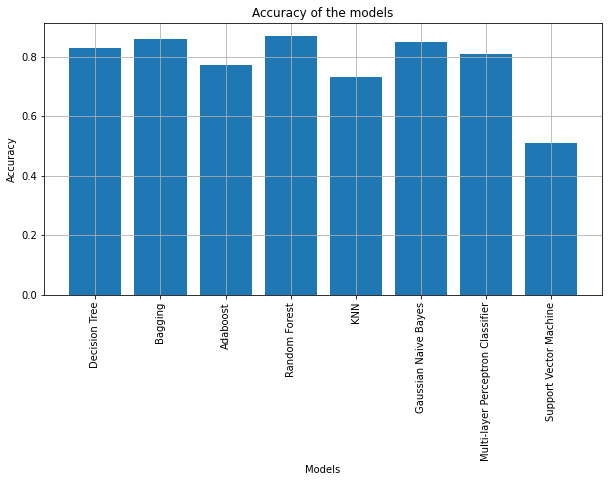

In [16]:
# Visualize the accuracy of the models

models = [
    'Decision Tree',
    'Bagging',
    'Adaboost',
    'Random Forest',
    'KNN',
    'Gaussian Naive Bayes',
    'Multi-layer Perceptron Classifier',
    'Support Vector Machine',
    ]
accuracy = [
    0.83,
    0.86,
    0.77,
    0.87,
    0.73,
    0.85,
    0.81,
    0.51,
    ]

plt.figure(figsize=(10,5))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of the models')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [23]:
vc = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16)),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=5,
        min_samples_leaf=0.12,
        random_state=0,
        n_jobs=-1,
        oob_score=True,
        bootstrap=True,
        )),
    ('knn', KNeighborsClassifier(n_neighbors=10, weights='distance',
     metric='manhattan', algorithm='auto')),
    ('gnb', GaussianNB(var_smoothing=1e-09)),
    ('lvq', MLPClassifier(
        hidden_layer_sizes=(10, ),
        activation='relu',
        solver='adam',
        alpha=0.05,
        learning_rate='constant',
        random_state=0,
        )),
    ('svm', SVC(
        C=100,
        gamma=0.001,
        kernel='rbf',
        random_state=0,
        probability=True,
        decision_function_shape='ovo',
        shrinking=True,
        )),
    ])

# Fit the classifier to the training data

vc.fit(X_train, y_train)

# Evaluate the test set predictions

y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 91.43%
